In [1]:
import sys, os 

ROOT_PATH = 'D:\\fcrm_code'

if ROOT_PATH not in sys.path: sys.path.append(ROOT_PATH)

## IMPORT PACKAGES

In [2]:
# Core package
import pickle

import numpy as np
import pandas as pd

# Viz packages
from matplotlib import pyplot as plt 
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('rainbow')

In [3]:
# Machine learning package
# Toolbox
from sklearn.model_selection import (
    train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
)

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import cross_validate

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as imb_make_pipeline

# Algorithm
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

In [16]:
# model_data = pd.read_pickle('../../../data/emb_model_data_v3.df')
# model_data

In [17]:
# model_data.dtypes.to_clipboard()

In [5]:
# model_data[[
#     'ACCT_AGE' -- Thời gian của account trên hệ thống
#     , 'ACTV_FAIL_CNT_LAST_12H' -- Số lượt kích hoạt ko thành công 12 giờ
#     , 'BEN_NAME_FT_AMT_mean_LAST_91D' -- TB giá trị giao dịch cùng tên người thụ hưởng 3 tháng
#     , 'BEN_NAME_FT_AMT_median_LAST_91D'
#     , 'BEN_NAME_FT_AMT_mode_LAST_91D'
#     , 'BEN_NAME_FT_AMT_std_LAST_91D'
#     , 'BEN_NAME_FT_AMT_sum_LAST_91D'
#     , 'BEN_NAME_FT_AMT_zscore_LAST_91D'
#     , 'BEN_NAME_FT_CNT_mean_LAST_91D' -- Đếm sl giao dịch cùng tên người thụ hưởng 3 tháng
#     , 'BEN_NAME_FT_CNT_median_LAST_91D'
#     , 'BEN_NAME_FT_CNT_mode_LAST_91D'
#     , 'BEN_NAME_FT_CNT_std_LAST_91D'
#     , 'BEN_NAME_FT_CNT_sum_LAST_91D'
#     , 'BEN_NAME_FT_CNT_zscore_LAST_91D'
#     , 'CHECK_INFO_CNT_LAST_12H' -- Số lượt kiểm tra thông tin TK trong 12h
#     , 'CLCK_SPD' -- Tốc độ thao tác
#     , 'CUST_AGE' -- Tuổi của KH
#     , 'DEVICE_AGENT_ACTV_FAIL_CNT_LAST_12H' -- Số lượt kích hoạt ko thành công của thiết bị trong 12h
#     , 'DEVICE_AGENT_CNT_LAST_12H' -- Số lượng thiết bị truy cập vào TK trong 12h
#     , 'DEVICE_AGENT_FT_AMT_mean_LAST_91D' -- TB Số tiền giao dịch của 1 thiết bị trong 3 tháng
#     , 'DEVICE_AGENT_FT_AMT_median_LAST_91D'
#     , 'DEVICE_AGENT_FT_AMT_mode_LAST_91D'
#     , 'DEVICE_AGENT_FT_AMT_std_LAST_91D'
#     , 'DEVICE_AGENT_FT_AMT_sum_LAST_91D'
#     , 'DEVICE_AGENT_FT_AMT_zscore_LAST_91D'
#     , 'DEVICE_AGENT_FT_CNT_mean_LAST_91D' -- TB Số lượng giao dịch của 1 thiết bị trong 3 tháng
#     , 'DEVICE_AGENT_FT_CNT_median_LAST_91D'
#     , 'DEVICE_AGENT_FT_CNT_mode_LAST_91D'
#     , 'DEVICE_AGENT_FT_CNT_std_LAST_91D'
#     , 'DEVICE_AGENT_FT_CNT_sum_LAST_91D'
#     , 'DEVICE_AGENT_FT_CNT_zscore_LAST_91D'
#     , 'FT_AMT_mean_LAST_91D'
#     , 'FT_AMT_std_LAST_91D'
#     , 'FT_AMT_zscore_LAST_91D'
#     , 'FT_CNT_LAST_12H'
#     , 'INH_IND'
#     , 'LATE_HR_AMT'
#     , 'LATE_HR_IND'
#     , 'LATE_HR_TRANS_CNT_LAST_91D'
#     , 'LOGIN_FAIL_CNT_LAST_12H'
#     , 'OCTET2_CNT_LAST_30D' -- Số lượng vị trí giao dịch trong 30 ngày gần nhất
#     , 'OPEN_LOAN_IND'
#     , 'TRANS_AMOUNT'
#     , 'SESS_OPEN_LOAN_CNT'
#     , 'TRANS_HOUR'
#     , 'FRAUD'
# ]].to_pickle('fraud_data.df.zip', compression='zip')

## LOAD DATA

In [4]:
model_data = pd.read_pickle('fraud_data.df.zip')

display(
    model_data.info(),
    model_data.head()
)

<class 'pandas.core.frame.DataFrame'>
Index: 27258 entries, 9BB17443223F01F6E0530A0108D281AB to B7BFCB71C47B000AE0530A0108D376DA
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ACCT_AGE                             27106 non-null  float64
 1   ACTV_FAIL_CNT_LAST_12H               27256 non-null  float64
 2   BEN_NAME_FT_AMT_mean_LAST_91D        5155 non-null   object 
 3   BEN_NAME_FT_AMT_median_LAST_91D      5155 non-null   object 
 4   BEN_NAME_FT_AMT_mode_LAST_91D        5155 non-null   object 
 5   BEN_NAME_FT_AMT_std_LAST_91D         5155 non-null   object 
 6   BEN_NAME_FT_AMT_sum_LAST_91D         5155 non-null   object 
 7   BEN_NAME_FT_AMT_zscore_LAST_91D      5016 non-null   object 
 8   BEN_NAME_FT_CNT_mean_LAST_91D        5155 non-null   object 
 9   BEN_NAME_FT_CNT_median_LAST_91D      5155 non-null   object 
 10  BEN_NAME_FT_CNT_mode_LAST_91D        5155

None

,ACCT_AGE,ACTV_FAIL_CNT_LAST_12H,BEN_NAME_FT_AMT_mean_LAST_91D,BEN_NAME_FT_AMT_median_LAST_91D,BEN_NAME_FT_AMT_mode_LAST_91D,BEN_NAME_FT_AMT_std_LAST_91D,BEN_NAME_FT_AMT_sum_LAST_91D,BEN_NAME_FT_AMT_zscore_LAST_91D,BEN_NAME_FT_CNT_mean_LAST_91D,BEN_NAME_FT_CNT_median_LAST_91D,...,LATE_HR_AMT,LATE_HR_IND,LATE_HR_TRANS_CNT_LAST_91D,LOGIN_FAIL_CNT_LAST_12H,OCTET2_CNT_LAST_30D,OPEN_LOAN_IND,TRANS_AMOUNT,SESS_OPEN_LOAN_CNT,TRANS_HOUR,FRAUD
TRANS_ID,,,,,,,,,,,,,,,,,,,,,
9BB17443223F01F6E0530A0108D281AB,9.535994,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,12.0,0.0,2.0,0.0,12500000.0,0.0,15,NaN
9BB2D912E7FD006EE0530A0108D23700,9.536205,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,12.0,0.0,2.0,0.0,300000.0,0.0,17,NaN
9C1A5E5858EF0022E0530A0108D2056C,9.550257,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,12.0,0.0,2.0,0.0,1000000.0,0.0,20,NaN
9B8A5AE367790016E0530A0108D2941B,9.530648,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,12.0,0.0,2.0,0.0,2400000.0,0.0,16,NaN
9C708B6D755B01E0E0530A0108D21196,9.562815,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,12.0,0.0,4.0,0.0,100000.0,0.0,10,NaN


In [7]:
model_data.fillna(0, inplace=True)

In [8]:
x_data, y_data = model_data.drop(columns=['FRAUD']), model_data['FRAUD']

display(
    x_data, y_data
)

,ACCT_AGE,ACTV_FAIL_CNT_LAST_12H,BEN_NAME_FT_AMT_mean_LAST_91D,BEN_NAME_FT_AMT_median_LAST_91D,BEN_NAME_FT_AMT_mode_LAST_91D,BEN_NAME_FT_AMT_std_LAST_91D,BEN_NAME_FT_AMT_sum_LAST_91D,BEN_NAME_FT_AMT_zscore_LAST_91D,BEN_NAME_FT_CNT_mean_LAST_91D,BEN_NAME_FT_CNT_median_LAST_91D,...,INH_IND,LATE_HR_AMT,LATE_HR_IND,LATE_HR_TRANS_CNT_LAST_91D,LOGIN_FAIL_CNT_LAST_12H,OCTET2_CNT_LAST_30D,OPEN_LOAN_IND,TRANS_AMOUNT,SESS_OPEN_LOAN_CNT,TRANS_HOUR
TRANS_ID,,,,,,,,,,,,,,,,,,,,,
9BB17443223F01F6E0530A0108D281AB,9.535994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,0.0,2.0,0.0,12500000.0,0.0,15
9BB2D912E7FD006EE0530A0108D23700,9.536205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,0.0,2.0,0.0,300000.0,0.0,17
9C1A5E5858EF0022E0530A0108D2056C,9.550257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,0.0,2.0,0.0,1000000.0,0.0,20
9B8A5AE367790016E0530A0108D2941B,9.530648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,12.0,0.0,2.0,0.0,2400000.0,0.0,16
9C708B6D755B01E0E0530A0108D21196,9.562815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,0.0,4.0,0.0,100000.0,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B742A9FF448C038CE0530A0108D3E844,2.516297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,43.0,0.0,2.0,0.0,2000000.0,0.0,10
B75513EAC60800CEE0530A0108D3169E,2.518796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,35.0,0.0,3.0,0.0,300000.0,0.0,8
B75516BD5C050030E0530A0108D2C9A9,2.518798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,35.0,0.0,3.0,0.0,100000.0,0.0,8


TRANS_ID
9BB17443223F01F6E0530A0108D281AB    0.0
9BB2D912E7FD006EE0530A0108D23700    0.0
9C1A5E5858EF0022E0530A0108D2056C    0.0
9B8A5AE367790016E0530A0108D2941B    0.0
9C708B6D755B01E0E0530A0108D21196    0.0
                                   ... 
B742A9FF448C038CE0530A0108D3E844    0.0
B75513EAC60800CEE0530A0108D3169E    0.0
B75516BD5C050030E0530A0108D2C9A9    0.0
B77CEEFABE160190E0530A0108D31B01    0.0
B7BFCB71C47B000AE0530A0108D376DA    0.0
Name: FRAUD, Length: 27258, dtype: float64

### TRAIN-TEST SPLIT

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, 
    stratify=y_data, random_state=42
)

print(f'Total number of features: {len(x_test.columns)}.')
print(f'Training data has {x_train.shape[0]:,} records with {y_train.sum()} case fraud! ~ {y_train.sum()/x_train.shape[0]:.2%}')
print(f'Testing data has {x_test.shape[0]:,} records with {y_test.sum()} case fraud! ~ {y_test.sum()/x_test.shape[0]:.2%}')

Total number of features: 45.
Training data has 21,806 records with 188.0 case fraud! ~ 0.86%
Testing data has 5,452 records with 47.0 case fraud! ~ 0.86%


## COMPARE ALGORITHMS

### Support functions

In [10]:
def f_score_calc(precision, recall, beta: int=1):
    beta_sqr = np.square(beta)
    return (1+beta_sqr)*precision*recall/(beta_sqr*precision + recall)
    
def custom_cross_validation(
    clr, X_data, Y_data, scoring, cv, n_jobs=2, verbose=8, 
    return_estimator=False, **kwargs) -> dict:
    
    validation = cross_validate(
        clr, X_data, Y_data, scoring=scoring, cv=cv, 
        n_jobs=n_jobs, verbose=verbose, return_estimator=return_estimator, **kwargs
    )
    
    clf_names = [f'Test_{i}' for i in range(len(validation['fit_time']))]
    test_scores = [f'test_{i}' for i in scoring]
    scoring_table = pd.DataFrame({k: validation.pop(k)*100 for k in test_scores}, index=clf_names)
    scoring_table['test_f2'] = f_score_calc(scoring_table['test_precision'], scoring_table['test_recall'], 2)
    return validation, scoring_table

def evaluate_stability(scoring_table):
    if 'Model' in scoring_table.columns:
        stability = scoring_table.groupby('Model').agg(['min', 'max', 'mean', 'std'])\
                    .stack(0).reset_index(level=0)
    else:
        stability = scoring_table.agg(['min', 'max', 'mean', 'std']).T
    stability['confidence'] = stability['mean']/stability['std']
    return stability

def compare_model(*args, names: list=None):
    if not names:
        names = [f'Model_{i+1}' for i in range(len(args))]
    coll = []
    for name, arg in zip(names, args):
        new_arg = arg.assign(Model=name)
        coll.append(new_arg)
    return pd.concat(coll, axis=0)

### Run algorithms

In [33]:
CV50 = RepeatedStratifiedKFold(random_state=42) # Kfold K = 5 repeat 10

TREE_BASE = DecisionTreeClassifier(
    criterion='gini', 
    random_state=42, 
    max_depth=6,
    max_features='sqrt'
)

FOREST_BASE = RandomForestClassifier(
    criterion='gini', 
    random_state=42, 
    max_depth=6,
    max_features='sqrt',
    # class_weight='balanced_subsample'
)

XGB =  XGBClassifier(
    validate_parameters=True,
    tree_method='hist',
    use_label_encoder=False,
    objective='binary:logistic',
    eval_metric='aucpr',
    min_child_weight= 5,
    gamma=1,
    subsample=0.6,
    colsample_bytree=0.6,
    max_depth=6
)


ROS = RandomOverSampler(sampling_strategy=0.1, random_state=42)

In [31]:
# TREE_BASE.fit(x_train, y_train)
pipeline = imb_make_pipeline(ROS, TREE_BASE)
pipeline.fit(x_train, y_train)

Pipeline(steps=[('randomoversampler',
                 RandomOverSampler(random_state=42, sampling_strategy=0.1)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6, max_features='sqrt',
                                        random_state=42))])

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      5405
         1.0       0.40      0.72      0.52        47

    accuracy                           0.99      5452
   macro avg       0.70      0.86      0.76      5452
weighted avg       0.99      0.99      0.99      5452



<AxesSubplot:>

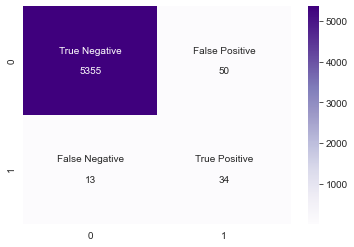

In [32]:
y_pred = TREE_BASE.predict(x_test)


print(metrics.classification_report(y_test, y_pred)),
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
labels = np.asarray([f'{i}\n\n{j}' for i, j in zip(names, cf_matrix.flatten())])
sns.heatmap(cf_matrix, annot=labels.reshape(2, 2), cmap='Purples', fmt='')

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5405
         1.0       0.72      0.81      0.76        47

    accuracy                           1.00      5452
   macro avg       0.86      0.90      0.88      5452
weighted avg       1.00      1.00      1.00      5452



<AxesSubplot:>

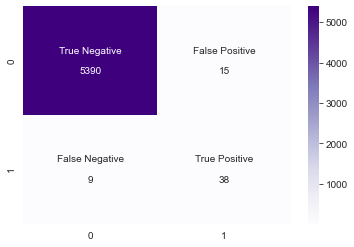

In [29]:
# FOREST_BASE.fit(x_train, y_train)
pipeline = imb_make_pipeline(ROS, FOREST_BASE)
pipeline.fit(x_train, y_train)
y_pred = FOREST_BASE.predict(x_test)

print(metrics.classification_report(y_test, y_pred)),
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
labels = np.asarray([f'{i}\n\n{j}' for i, j in zip(names, cf_matrix.flatten())])
sns.heatmap(cf_matrix, annot=labels.reshape(2, 2), cmap='Purples', fmt='')

C:\Users\tdoan\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_by_tree" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:04:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5405
         1.0       0.82      0.89      0.86        47

    accuracy                           1.00      5452
   macro avg       0.91      0.95      0.93      5452
weighted avg       1.

<AxesSubplot:>

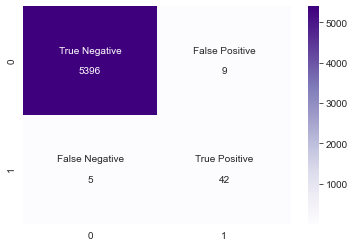

In [34]:
# FOREST_BASE.fit(x_train, y_train)
pipeline = imb_make_pipeline(ROS, XGB)
pipeline.fit(x_train, y_train)
y_pred = XGB.predict(x_test)

print(metrics.classification_report(y_test, y_pred)),
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
labels = np.asarray([f'{i}\n\n{j}' for i, j in zip(names, cf_matrix.flatten())])
sns.heatmap(cf_matrix, annot=labels.reshape(2, 2), cmap='Purples', fmt='')

In [54]:
TREE_BASE = DecisionTreeClassifier(
    criterion='gini', 
    random_state=42, 
    max_depth=6,
    max_features='sqrt'
)

FOREST_BASE = RandomForestClassifier(
    criterion='gini', 
    random_state=42, 
    max_depth=6,
    max_features='sqrt',
    # class_weight='balanced_subsample'
)

XGB =  XGBClassifier(
    validate_parameters=True,
    tree_method='hist',
    use_label_encoder=False,
    objective='binary:logistic',
    eval_metric='aucpr',
    min_child_weight= 5,
    gamma=1,
    subsample=0.6,
    colsample_bytree=0.6,
    max_depth=6
)

SCORES = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall', 'roc_auc']

In [41]:
clrs = {
    'DT': TREE_BASE, 
    'RF': FOREST_BASE, 
    'XGB': XGB
}

# clrs = [dt_clr, rf_clr, xg_clr]

scoring_tables = []
validations = []

for clr_name, clr in clrs.items():
    pipeline = imb_make_pipeline(ROS, clr)
    validation, scoring_table = custom_cross_validation(
        pipeline, x_data, y_data, cv=CV50, 
        scoring=SCORES, n_jobs=8, return_estimator=True
    )
    scoring_tables.append(scoring_table)
    validations.append(validation)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    4.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    5.5s
[Parallel(n_jobs=8)]: Done  42 out of  50 | elapsed:    6.8s remaining:    1.2s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    7.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    4.1s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   16.4s
[Parallel(n_jobs=8)]: Done  42 out of  50 | elapsed:   24.8s remaining:    4.6s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:   27.4s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   11.4s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   46.4s
[Parallel(n_jobs=8)]: Done  42 out of  50 | elapsed:  1.2min remaining:   13.3s
[Parallel(n_jobs=8)]: Done  5

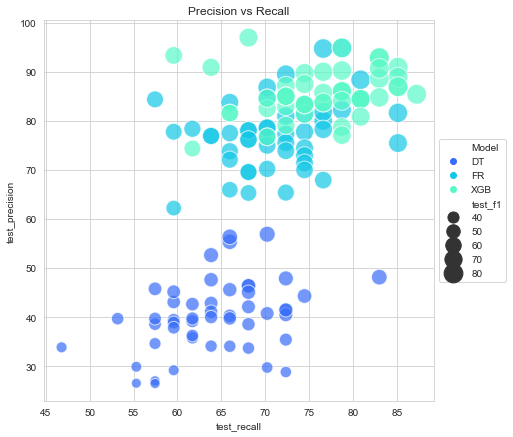

In [42]:
compared = compare_model(*scoring_tables, names=clrs.keys())

plt.figure(figsize=(7, 7))
ax = sns.scatterplot(data=compared, x='test_recall', y='test_precision', 
                hue='Model', size='test_f1', sizes=(100, 400), alpha=0.7)
ax.set_title('Precision vs Recall')
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')

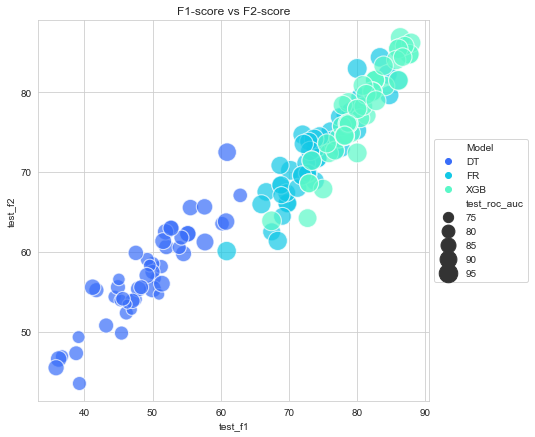

In [43]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(data=compared, x='test_f1', y='test_f2', 
                hue='Model', size='test_roc_auc', sizes=(100, 400), alpha=0.7)
ax.set_title('F1-score vs F2-score')
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')

In [44]:
compared_stability = evaluate_stability(compared)
compared_stability.sort_index()

,Model,max,mean,min,std,confidence
test_accuracy,DT,99.284666,98.827859,98.220510,0.260887,378.814985
test_accuracy,XGB,99.798239,99.681927,99.486427,0.067490,1476.996866
test_accuracy,FR,99.779897,99.570767,99.339571,0.091610,1086.902302
test_balanced_accuracy,DT,91.100833,81.670824,73.006475,3.270683,24.970573
test_balanced_accuracy,XGB,93.552266,88.007211,79.768733,3.175749,27.712267
test_balanced_accuracy,FR,92.469935,85.567800,78.677151,3.030486,28.235669
test_f1,DT,62.857143,49.050947,35.862069,6.497978,7.548648
test_f1,XGB,87.912088,80.404338,67.441860,4.516885,17.800838
test_f1,FR,86.046512,74.136791,60.869565,5.319190,13.937610
test_f2,XGB,86.864407,77.752670,63.876652,5.581672,13.929996


## FEATURE FILTERING

In [47]:
feature_score_table = pd.DataFrame(
    [clr[-1].feature_importances_ for clr in validations[2]['estimator']],
    columns=x_data.columns
)

display(feature_score_table.shape, feature_score_table.head())

(50, 45)

,ACCT_AGE,ACTV_FAIL_CNT_LAST_12H,BEN_NAME_FT_AMT_mean_LAST_91D,BEN_NAME_FT_AMT_median_LAST_91D,BEN_NAME_FT_AMT_mode_LAST_91D,BEN_NAME_FT_AMT_std_LAST_91D,BEN_NAME_FT_AMT_sum_LAST_91D,BEN_NAME_FT_AMT_zscore_LAST_91D,BEN_NAME_FT_CNT_mean_LAST_91D,BEN_NAME_FT_CNT_median_LAST_91D,...,INH_IND,LATE_HR_AMT,LATE_HR_IND,LATE_HR_TRANS_CNT_LAST_91D,LOGIN_FAIL_CNT_LAST_12H,OCTET2_CNT_LAST_30D,OPEN_LOAN_IND,TRANS_AMOUNT,SESS_OPEN_LOAN_CNT,TRANS_HOUR
0,0.023291,0.533378,0.018147,0.000000,0.0,0.031072,0.0,0.0,0.0,0.0,...,0.015520,0.018548,0.001654,0.006723,0.015174,0.016001,0.0,0.035743,0.035407,0.014349
1,0.026566,0.494006,0.022068,0.000000,0.0,0.036675,0.0,0.0,0.0,0.0,...,0.017389,0.017072,0.000000,0.011607,0.014134,0.014609,0.0,0.036373,0.031855,0.012349
2,0.019047,0.450405,0.029105,0.000000,0.0,0.043537,0.0,0.0,0.0,0.0,...,0.012548,0.019861,0.002744,0.017774,0.015725,0.023460,0.0,0.033945,0.029346,0.012548
3,0.016111,0.549383,0.022431,0.007994,0.0,0.030259,0.0,0.0,0.0,0.0,...,0.012640,0.019166,0.001521,0.010476,0.010371,0.014675,0.0,0.030656,0.018761,0.011326
4,0.019765,0.564523,0.019435,0.000000,0.0,0.028293,0.0,0.0,0.0,0.0,...,0.013233,0.024043,0.000000,0.010029,0.009702,0.016954,0.0,0.032175,0.013767,0.010587


In [48]:
feature_scores = feature_score_table.agg(['mean', 'std']).T
feature_scores['conf'] = feature_scores['mean']/feature_scores['std']
feature_scores.sort_values('mean', ascending=False, inplace=True)
feature_scores

,mean,std,conf
ACTV_FAIL_CNT_LAST_12H,0.537771,0.036716,14.646748
TRANS_AMOUNT,0.031719,0.003602,8.806747
CHECK_INFO_CNT_LAST_12H,0.031358,0.004171,7.517801
BEN_NAME_FT_AMT_std_LAST_91D,0.028571,0.007586,3.766256
LATE_HR_AMT,0.022393,0.008239,2.717969
BEN_NAME_FT_AMT_mean_LAST_91D,0.022036,0.010481,2.102434
DEVICE_AGENT_FT_CNT_sum_LAST_91D,0.020577,0.005614,3.665324
SESS_OPEN_LOAN_CNT,0.020426,0.008693,2.349635
ACCT_AGE,0.020356,0.002918,6.975025
CUST_AGE,0.018966,0.003387,5.599289


In [50]:
feature_scores = feature_scores[feature_scores['mean'].gt(0)]
display(
    feature_scores.shape,
    feature_scores
)

(35, 3)

,mean,std,conf
ACTV_FAIL_CNT_LAST_12H,0.537771,0.036716,14.646748
TRANS_AMOUNT,0.031719,0.003602,8.806747
CHECK_INFO_CNT_LAST_12H,0.031358,0.004171,7.517801
BEN_NAME_FT_AMT_std_LAST_91D,0.028571,0.007586,3.766256
LATE_HR_AMT,0.022393,0.008239,2.717969
BEN_NAME_FT_AMT_mean_LAST_91D,0.022036,0.010481,2.102434
DEVICE_AGENT_FT_CNT_sum_LAST_91D,0.020577,0.005614,3.665324
SESS_OPEN_LOAN_CNT,0.020426,0.008693,2.349635
ACCT_AGE,0.020356,0.002918,6.975025
CUST_AGE,0.018966,0.003387,5.599289


In [55]:
CV30 = RepeatedStratifiedKFold(n_repeats=6)

eliminated = []
eliminated_result = pd.DataFrame()

for it, col in enumerate(feature_scores.index[10::-1]):
    print(it)
    x_rfe = x_data[feature_scores.index].drop(columns=[*eliminated, col])
    pipeline = imb_make_pipeline(ROS, XGB)
    _, scoring_table = custom_cross_validation(
        pipeline, x_rfe, y_data, scoring=SCORES, cv=CV30, n_jobs=8, verbose=0
    )

    col_stab = evaluate_stability(scoring_table)
    col_stab['feature'] = col
    col_stab['feature_count'] = x_rfe.shape[1]
    col_stab['round'] = it+1
    eliminated_result = eliminated_result.append(col_stab)
    # scores[col] = col_stab.loc['test_f2', 'mean']
    eliminated.append(col)

0
1
2
3
4
5
6
7
8
9
10


In [59]:
eliminated_result.reset_index()

,index,min,max,mean,std,confidence,feature,feature_count,round
0,test_accuracy,99.541453,99.853238,99.683885,0.057942,1720.398354,DEVICE_AGENT_CNT_LAST_12H,44,1
1,test_balanced_accuracy,82.923209,94.653094,87.888679,2.634492,33.360766,DEVICE_AGENT_CNT_LAST_12H,44,1
2,test_f1,73.809524,91.304348,80.512353,3.539765,22.745109,DEVICE_AGENT_CNT_LAST_12H,44,1
3,test_precision,72.000000,96.969697,86.159379,5.168214,16.671015,DEVICE_AGENT_CNT_LAST_12H,44,1
4,test_recall,65.957447,89.361702,75.886525,5.281106,14.369437,DEVICE_AGENT_CNT_LAST_12H,44,1
...,...,...,...,...,...,...,...,...,...
72,test_f1,36.734694,62.385321,49.946385,5.701094,8.760842,ACTV_FAIL_CNT_LAST_12H,34,11
73,test_precision,35.294118,57.142857,49.038039,5.600362,8.756226,ACTV_FAIL_CNT_LAST_12H,34,11
74,test_recall,38.297872,72.340426,51.418440,8.060032,6.379433,ACTV_FAIL_CNT_LAST_12H,34,11
75,test_roc_auc,91.266164,98.478556,95.238581,1.701589,55.970392,ACTV_FAIL_CNT_LAST_12H,34,11


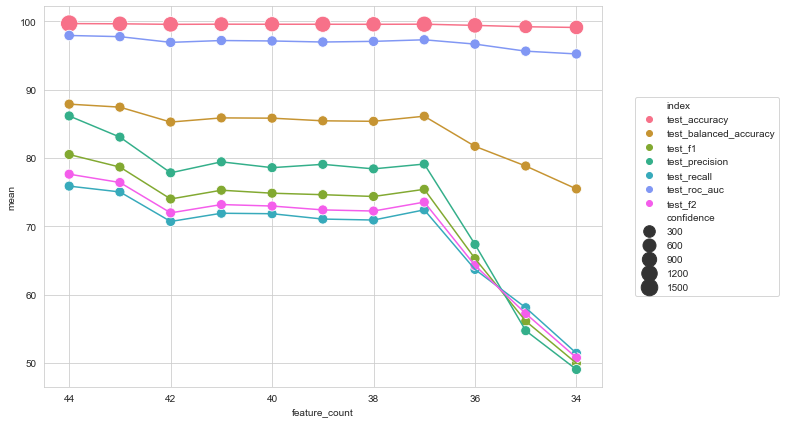

In [60]:
fig = plt.figure(figsize=(10, 7))
sns.lineplot(data=eliminated_result.reset_index(), x='feature_count', y='mean', hue='index', legend=False)
ax1 = sns.scatterplot(data=eliminated_result.reset_index(), x='feature_count', y='mean', hue='index', size='confidence', sizes=(100, 300))
ax1.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
ax1.invert_xaxis()
# ax2 = ax1.twinx()
# sns.barplot(data=plot_data, x='feature_count_str', y='feature_count', ax=ax2, alpha=0.5)


## OPTIMIZE HYPER-PARAMETERS

In [62]:
import itertools

def get_params_roulette(params_grid):
    return (dict(zip(params_grid.keys(), i)) for i in itertools.product(*params_grid.values()))

params_grid = dict(
    # min_child_weight=[1, 3]
    subsample=[0.8, 1],
    max_depth=[6, 7],
    # colsample_bytree=[0.1, 0.25, 0.5, 0.8],
    learning_rate=[0.5, 0.3, 0.1]
)

base_clr = XGBClassifier(
    validate_parameters=True,
    tree_method='hist',
    use_label_encoder=False,
    objective='binary:logistic',
    eval_metric='aucpr'
)

scoring_tables = []
validations = []
params_collection = [] 

print(f'Starting Hyper-parameter grid search for {len(list(get_params_roulette(params_grid)))} iterations!')

for i, params in enumerate(get_params_roulette(params_grid)):
    print(f'Starting iteration {i+1}!')
    params_collection.append(params)
    clr = base_clr.set_params(**{**base_clr.get_params(), **params})
    pipeline = imb_make_pipeline(ROS, clr)
    validation, scoring_table = custom_cross_validation(
        pipeline, x_data[feature_scores.index], y_data,
        scoring=SCORES, cv=CV30, n_jobs=8
    )
    scoring_tables.append(scoring_table)
    validations.append(validation)
    # if i == 5: break

Starting Hyper-parameter grid search for 12 iterations!
Starting iteration 1!


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    8.6s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:   17.4s remaining:   10.0s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:   18.2s remaining:    5.5s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:   20.9s remaining:    2.2s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   21.3s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Starting iteration 2!


[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    3.4s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:   11.6s remaining:    6.7s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:   12.4s remaining:    3.7s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:   14.5s remaining:    1.5s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   14.6s finished


Starting iteration 3!


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    3.7s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:   13.3s remaining:    7.7s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:   14.0s remaining:    4.2s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:   16.8s remaining:    1.8s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   17.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Starting iteration 4!


[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    4.4s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:   13.2s remaining:    7.6s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:   14.7s remaining:    4.4s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:   18.3s remaining:    1.9s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   18.4s finished


Starting iteration 5!


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    4.8s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:   11.9s remaining:    6.8s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:   12.8s remaining:    3.8s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:   15.1s remaining:    1.6s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   15.3s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Starting iteration 6!


[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    4.5s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:   13.7s remaining:    7.9s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:   14.4s remaining:    4.3s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:   17.4s remaining:    1.8s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   17.6s finished


Starting iteration 7!


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:    9.2s remaining:    5.3s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:   10.0s remaining:    3.0s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:   11.6s remaining:    1.2s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   11.7s finished


Starting iteration 8!


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    3.7s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:    9.7s remaining:    5.6s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:   10.5s remaining:    3.1s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:   12.2s remaining:    1.3s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   12.4s finished


Starting iteration 9!


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    4.0s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:   11.4s remaining:    6.5s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:   12.3s remaining:    3.7s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:   14.4s remaining:    1.5s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   14.6s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Starting iteration 10!


[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:    8.1s remaining:    4.7s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:    8.8s remaining:    2.6s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:   10.4s remaining:    1.1s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   10.6s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Starting iteration 11!


[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:    9.7s remaining:    5.6s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:   10.6s remaining:    3.2s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:   12.5s remaining:    1.3s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   12.7s finished


Starting iteration 12!


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    3.6s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:   11.4s remaining:    6.6s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:   12.3s remaining:    3.7s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:   14.5s remaining:    1.5s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   14.7s finished


In [63]:
grid_search_result = pd.DataFrame(get_params_roulette(params_grid))\
    .join(pd.DataFrame([i.mean(axis=0) for i in scoring_tables]))\
    .sort_values(['test_f1', 'test_f2', 'test_roc_auc'], ascending=False)
grid_search_result

,subsample,max_depth,learning_rate,test_accuracy,test_balanced_accuracy,test_f1,test_precision,test_recall,test_roc_auc,test_f2
7,1.0,6,0.3,99.735858,88.864012,83.458892,90.463855,77.801418,97.599344,79.933196
1,0.8,6,0.3,99.735859,88.828860,83.435401,90.530033,77.730496,97.616979,79.876557
4,0.8,7,0.3,99.735246,88.617635,83.362957,90.750093,77.304965,97.615010,79.595396
6,1.0,6,0.5,99.734023,88.546713,83.251953,90.790968,77.163121,97.543433,79.455410
0,0.8,6,0.5,99.725462,88.155717,82.570751,90.432799,76.382979,97.559587,78.699056
10,1.0,7,0.3,99.719349,87.695650,82.188333,90.731281,75.460993,97.486706,77.978438
3,0.8,7,0.5,99.717516,87.800183,82.128830,90.095380,75.673759,97.661071,78.105963
9,1.0,7,0.5,99.718124,87.695033,82.109980,90.286799,75.460993,97.155924,77.968438
11,1.0,7,0.1,99.702228,87.300336,81.193411,89.186437,74.680851,97.672674,77.137925
8,1.0,6,0.1,99.699169,87.193336,80.896530,89.172272,74.468085,97.605294,76.867589


In [65]:
with open('saved_model.ml', 'wb') as f:
    pickle.dump(XGB, f)